## Модель кабеля по ГОСТ Р 51777-2001 и пример расчета различных параметров

In [8]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import GOST_cable_class as cb

### Анализ чувсвительности для температуры среды

Создание экземляра класса

In [9]:
cable = cb.Cable()

Диапазон измерений параметров

In [10]:
i_a_start = 5
i_a_end = 35
t_env_c_start = 40
t_env_c_end = 120 

Расчет через метод класса *calc_t_max_cable_c*

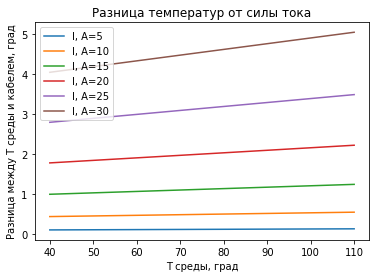

In [11]:
t_environment_c = []
i_cable_a = []
t_cable_c = []
t_difference_c = []
legend_names = []
for k in range(i_a_start,i_a_end,5):   
    for i in range(t_env_c_start,t_env_c_end,10):
        t_cable_c.append(float(cable.calc_t_max_cable_c(i , k)))
        t_environment_c.append(i) 
        t_difference_c.append(float(cable.calc_t_max_cable_c(i , k)) - i)
    
    legend_name='I, A='+str(k)
    legend_names.append(legend_name)
    plt.plot(t_environment_c,t_difference_c)
    t_environment_c.clear()
    t_difference_c.clear()

plt.legend(legend_names)
plt.xlabel('T среды, град')
plt.ylabel('Разница между T среды и кабелем, град')
plt.title('Разница температур от силы тока')
plt.show()         
    
    

### Анализ чувсвительности для температурного индекса кабеля

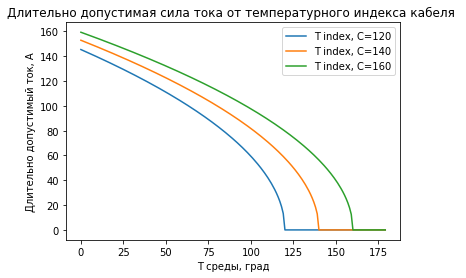

In [12]:
t_environment_c = []
i_max_a = []
legend_names = []
for k in range(120, 180, 20):
    for i in range(180):
        t_environment_c.append(i)
        i_max_a.append((cable.calc_i_max_a(k, i)))

    plt.plot(t_environment_c,i_max_a,label='Сила тока от температуры среды')
    legend_name='T index, С='+str(k)
    legend_names.append(legend_name)
    t_environment_c.clear()
    i_max_a.clear()
    
plt.legend(legend_names)
plt.xlabel('T среды, град')
plt.ylabel('Длительно допустимый ток, А')
plt.title('Длительно допустимая сила тока от температурного индекса кабеля ')
plt.show()    

    